In [3]:
import axelrod as axl
import matplotlib.pyplot as plt
import numpy as np

assert axl.__version__ == "3.6.0"

%matplotlib inline

Source file for the figures used in my talk given at: https://www.euroscipy.org/2017/

In [4]:
def moran(N, game, i=1, seed=0):
    """
    Return the population counts for the Moran process on a game
    """
    population = [0 for _ in range(i)] + [1 for _ in range(N - i)]
    counts = [(i, N - i)]
    
    np.random.seed(seed)
    
    while len(set(population)) == 2:
        
        scores = []
        
        for i, player in enumerate(population):
            total = 0
            for j, opponent in enumerate(population):
                if i != j:
                    total += game[player, opponent]
            scores.append(total)

        total_score = sum(scores)
        probabilities = [score / total_score for score in scores]
        reproduce_index = np.random.choice(range(N), p=probabilities)
        
        eliminate_index = np.random.randint(N)
        population[eliminate_index] = population[reproduce_index]
        
        counts.append((population.count(0), population.count(1)))
    return counts


In [5]:
game = np.array([[3, 0],
                 [5, 1]])
game += 1  # Make it so that a cooperator can become fixed.
moran(N=4, game=game, seed=2)

[(1, 3), (1, 3), (1, 3), (0, 4)]

In [6]:
moran(N=4, game=game, seed=17)

[(1, 3), (1, 3), (1, 3), (2, 2), (2, 2), (3, 1), (4, 0)]

Some match examples:

In [7]:
axl.Match((axl.TitForTat(), axl.Cooperator()), turns=5).play()

[(C, C), (C, C), (C, C), (C, C), (C, C)]

In [8]:
axl.Match((axl.TitForTat(), axl.Defector()), turns=5).play()

[(C, D), (D, D), (D, D), (D, D), (D, D)]

In [9]:
axl.Match((axl.TitForTat(), axl.Alternator()), turns=5).play()

[(C, C), (C, D), (D, C), (C, D), (D, C)]

Some Moran processes with more complex strategies:

In [10]:
game = axl.Game(r=4, p=2, s=1, t=6)
axl.seed(0)
N, i = 6, 1
players = [axl.Cooperator()] * i + [axl.Defector()] * (N - i)
mp = axl.MoranProcess(players, game=game)
mp.play()

[Counter({'Cooperator': 1, 'Defector': 5}),
 Counter({'Cooperator': 1, 'Defector': 5}),
 Counter({'Cooperator': 2, 'Defector': 4}),
 Counter({'Cooperator': 2, 'Defector': 4}),
 Counter({'Cooperator': 2, 'Defector': 4}),
 Counter({'Cooperator': 2, 'Defector': 4}),
 Counter({'Cooperator': 2, 'Defector': 4}),
 Counter({'Cooperator': 1, 'Defector': 5}),
 Counter({'Cooperator': 1, 'Defector': 5}),
 Counter({'Defector': 6})]

Drawing the plots of the Moran processes:

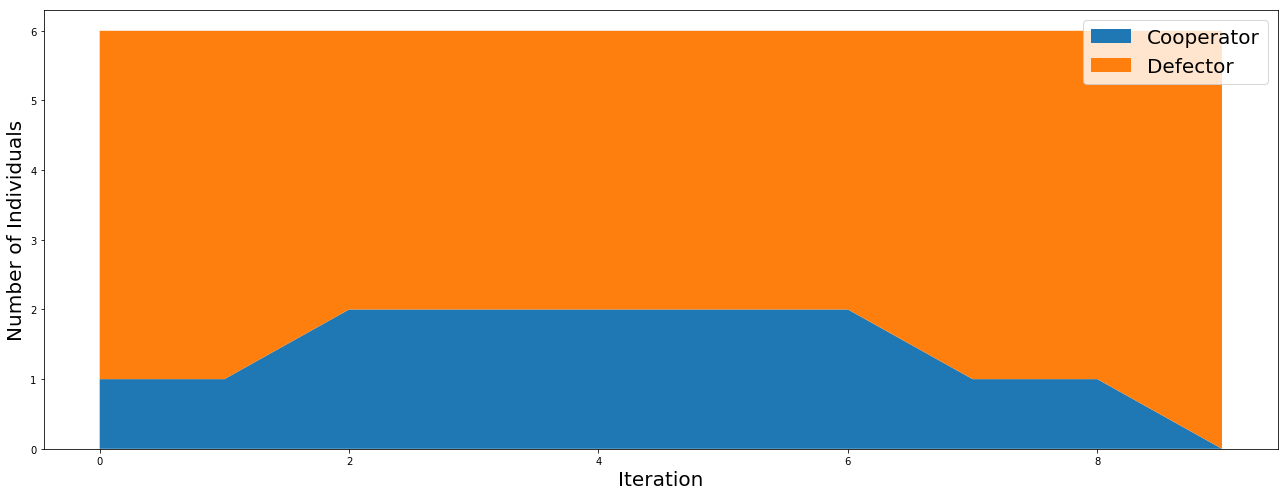

In [11]:
fig, ax = plt.subplots(1, figsize=(18, 7)) 
mp.populations_plot(ax)
ax.legend(fontsize=20)
ax.yaxis.label.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)

ax.set_title("")

fig.tight_layout()
fig.savefig("assets/moran_process_resistance.pdf", transparent=True)

In [12]:
def moran_process(seed):
    axl.seed(seed)
    N, i = 6, 1
    players = [axl.Cooperator()] * i + [axl.Defector()] * (N - i)
    mp = axl.MoranProcess(players, game=game)
    mp.play()
    return mp.winning_strategy_name

seed = 1
while moran_process(seed) != "Cooperator":
    seed += 1
seed

28

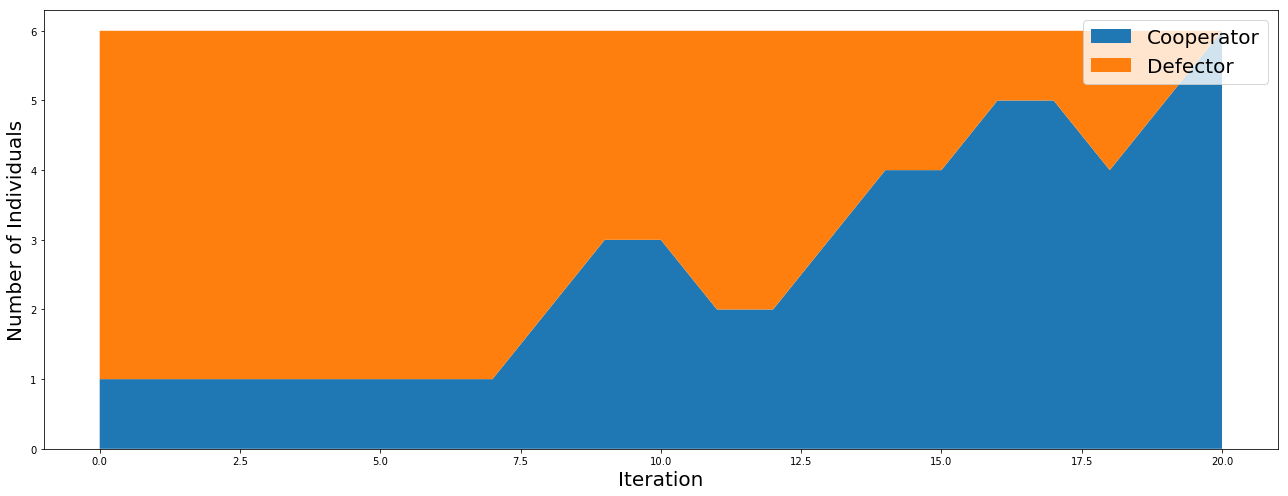

In [13]:
fig, ax = plt.subplots(1, figsize=(18, 7)) 

axl.seed(seed)
N, i = 6, 1
players = [axl.Cooperator()] * i + [axl.Defector()] * (N - i)
mp = axl.MoranProcess(players, game=game)
mp.play()
mp.populations_plot(ax)
ax.legend(fontsize=20)
ax.yaxis.label.set_fontsize(20)
ax.xaxis.label.set_fontsize(20)
ax.set_title("")

    

fig.tight_layout()
fig.savefig("assets/moran_process_invasion.pdf", transparent=True);

Drawing a fingerprint to show the handshake that evolved:

In [17]:
axl.seed(0)
tf = axl.TransitiveFingerprint(axl.TF1(), number_of_opponents=70)
data = tf.fingerprint(processes=0, repetitions=5000, turns=100)  # Large number of reps

Playing matches: 100%|██████████| 70/70 [03:47<00:00,  1.49s/it]


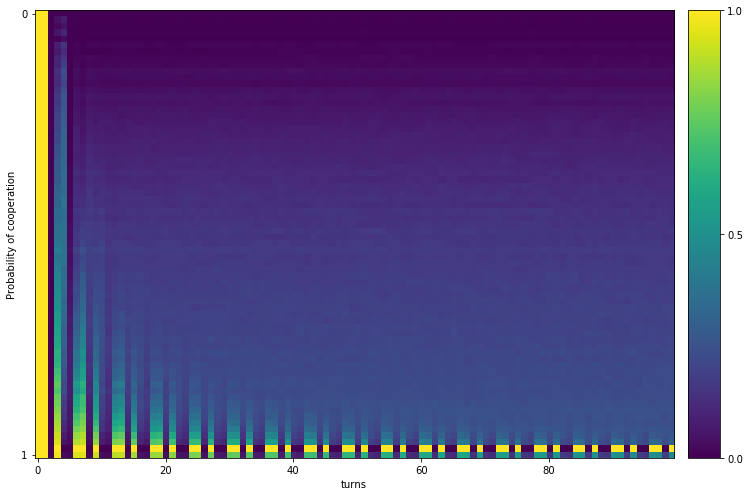

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(18, 7))
mat = ax.imshow(tf.data)

plt.xlabel('turns')
plt.yticks([0, len(tf.opponents) - 1], [0, 1])
plt.ylabel("Probability of cooperation")

ticks = [0, 1 / 2, 1]
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(mat, cax=cax, ticks=ticks)

plt.tight_layout()
plt.savefig("assets/tf1_transitive_fingerprint.pdf", bbox_inches="tight", transparent=True)